In [1]:
from __future__ import print_function
import pylab as pl
import seaborn
import numpy as np
from scipy.optimize import curve_fit, minimize
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


#### *Generate 100 samples of different sizes N (N>10 & N<2000) from each of 5 different distributions (500 samples in total), all with the same population mean.*

In [2]:
# pick five distributions
distributions = ['normal','poisson','binomial','chisquared','gumbel']

In [3]:
# pick a mean to use for all distibrutions
mean = 8.0

In [4]:
# initialize an empty dictionary for the distributions
all_distributions = {}

In [5]:
np.random.seed(10)

In [6]:
# make an array of random sizes between 10 and 2000
population = np.arange(10,2000, dtype=np.int)
sizes = np.random.choice(a=population, size=100, replace=False)

In [7]:
# make the distributions keys for nested dicts in the main dictionary
for distribution in distributions:
    all_distributions[distribution] = {}

# add dicts for means from the distributions to the same dictionary
for distribution in distributions:
    all_distributions[distribution]['means'] = {}

In [8]:
# make the normal distributions and add them to the dictionary
for sample in sizes:
    all_distributions['normal'][sample] = np.random.normal(loc=mean, size=sample)

# make the poisson distributions and add them to the dictionary
for sample in sizes:
    all_distributions['poisson'][sample] = np.random.poisson(lam=mean, size=sample)

# make the binomial distributions and add them to the dictionary
for sample in sizes:
    all_distributions['binomial'][sample] = np.random.binomial(n=mean, p=0.99, size=sample)
    
# make the chisquared distributions and add them to the dictionary
for sample in sizes:
    all_distributions['chisquared'][sample] = np.random.chisquare(df=mean, size=sample)
    
# make the gumbel distributions and add them to the dictionary
for sample in sizes:
    all_distributions['gumbel'][sample] = np.random.gumbel(loc=mean, scale=0.1, size=sample)

In [9]:
#append the mean for each size normal distribution to the means dictionary
for distribution in distributions:
    for sample in sizes:
        all_distributions[distribution]['means'][sample] = all_distributions[distribution][sample].mean()

#### *For each sample plot the sample mean (dependent variable) against the sample size N (independent variable) (if you want you can do it with the sample standard deviation as well).*

#### *Describe the behavior you see in the plots in terms of the law of large numbers.*

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python2/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


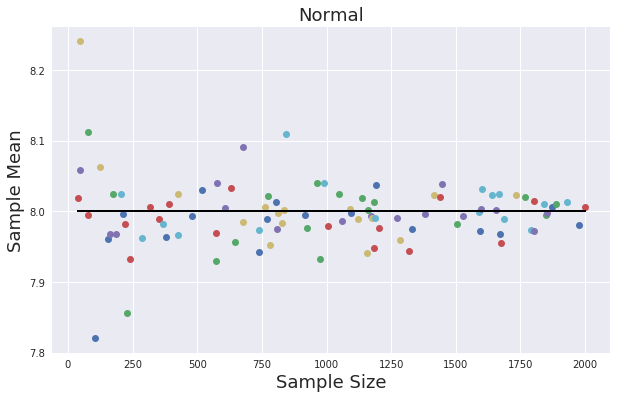

In [10]:
# make plot of sample means and sample size for normal distributions
axnormal_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for key in all_distributions['normal']['means']:
    axnormal_mu_n.plot(key, all_distributions['normal']['means'][key], 'o')
    axnormal_mu_n.set_xlabel('Sample Size', fontsize=18)
    axnormal_mu_n.set_ylabel('Sample Mean', fontsize=18)
    axnormal_mu_n.set_title('Normal', fontsize=18)
    axnormal_mu_n.plot([min(sizes), max(sizes)], [mean, mean], 'k')

Figure showing the sample means of 100 samples taken from a normal distribution, demonstrating that as the size of the sample increases, the sample mean gets closer to the expected (set) value.

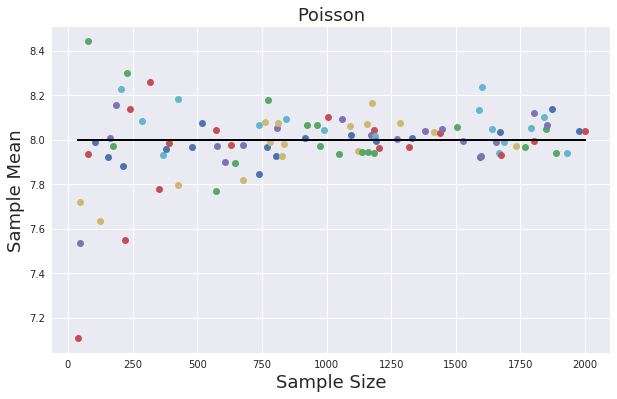

In [11]:
# make plot of sample means and sample size for poisson distributions
axpoisson_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for key in all_distributions['poisson']['means']:
    axpoisson_mu_n.plot(key, all_distributions['poisson']['means'][key], 'o')
    axpoisson_mu_n.set_xlabel('Sample Size', fontsize=18)
    axpoisson_mu_n.set_ylabel('Sample Mean', fontsize=18)
    axpoisson_mu_n.set_title('Poisson', fontsize=18)
    axpoisson_mu_n.plot([min(sizes), max(sizes)], [mean, mean], 'k')

Figure showing the sample means of 100 samples taken from a poisson distribution, demonstrating that as the size of the sample increases, the sample mean gets closer to the expected (set) value.

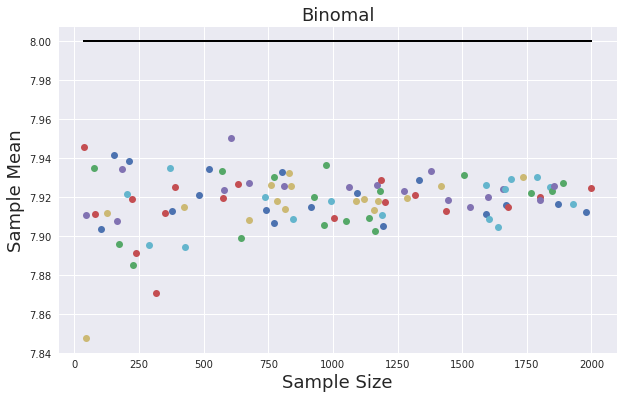

In [12]:
# make plot of sample means and sample size for binomial distributions
axbinomial_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for key in all_distributions['binomial']['means']:
    axbinomial_mu_n.plot(key, all_distributions['binomial']['means'][key], 'o')
    axbinomial_mu_n.set_xlabel('Sample Size', fontsize=18)
    axbinomial_mu_n.set_ylabel('Sample Mean', fontsize=18)
    axbinomial_mu_n.set_title('Binomal', fontsize=18)
    axbinomial_mu_n.plot([min(sizes), max(sizes)], [mean, mean], 'k')

Figure showing the sample means of 100 samples taken from a binomial distribution, demonstrating that as the size of the sample increases, the sample mean gets closer to the expected (set) value, which in the case of this binomial distribution, is 0.99 of 8.

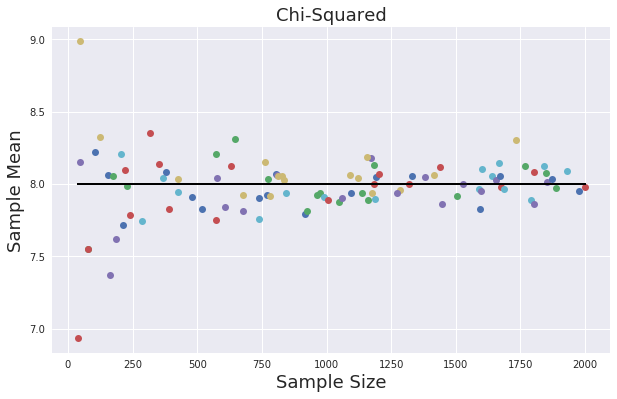

In [13]:
# make plot of sample means and sample size for chisquared distributions
axchisquare_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for key in all_distributions['chisquared']['means']:
    axchisquare_mu_n.plot(key, all_distributions['chisquared']['means'][key], 'o')
    axchisquare_mu_n.set_xlabel('Sample Size', fontsize=18)
    axchisquare_mu_n.set_ylabel('Sample Mean', fontsize=18)
    axchisquare_mu_n.set_title('Chi-Squared', fontsize=18)
    axchisquare_mu_n.plot([min(sizes), max(sizes)], [mean, mean], 'k')

Figure showing the sample means of 100 samples taken from a 
Chi Squared distribution, demonstrating that as the size of the sample increases, the sample mean gets closer to the expected (set) value.

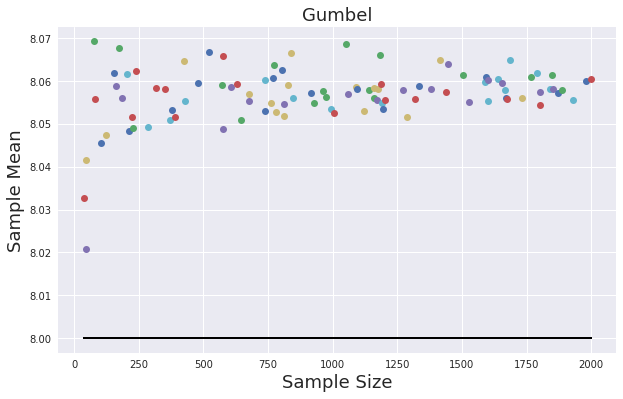

In [14]:
# make plot of sample means and sample size for gumbel distributions
axgumbel_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for key in all_distributions['gumbel']['means']:
    axgumbel_mu_n.plot(key, all_distributions['gumbel']['means'][key], 'o')
    axgumbel_mu_n.set_xlabel('Sample Size', fontsize=18)
    axgumbel_mu_n.set_ylabel('Sample Mean', fontsize=18)
    axgumbel_mu_n.set_title('Gumbel', fontsize=18)
    axgumbel_mu_n.plot([min(sizes), max(sizes)], [mean, mean], 'k')

Figure showing the sample means of 100 samples taken from a 
Gumbel distribution, demonstrating that as the size of the sample increases, the sample mean gets closer to the expected (set) value. Still learning about Gumbels but apparently they are used to model rare events, which is cool!

#### *PLOT the distributions of all sample means (together for all distributions). Mandatory: as a histogram. Optional: in any other way you think is convincing Extra Credit: FIT a gaussian to the distribution of means*

In [15]:
mean_lists = []

for distribution in distributions:
    mean_lists.append(list(all_distributions[distribution]['means'].values()))

all_means = []

for mean_list in mean_lists:
    for mean in mean_list:
        all_means.append(mean)


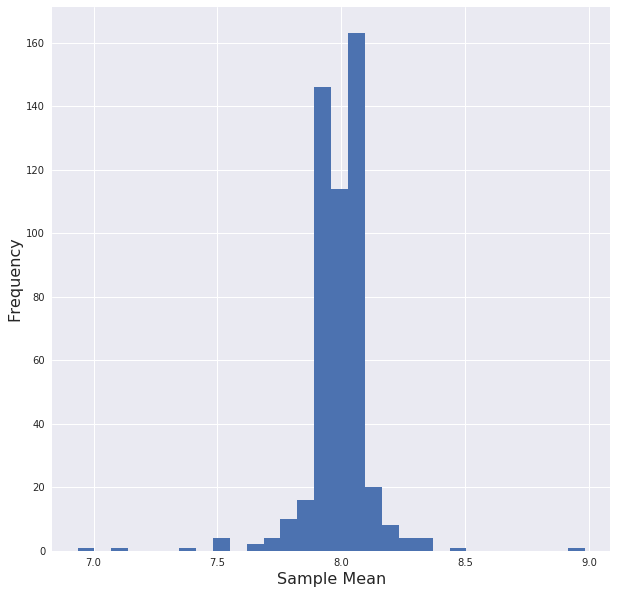

In [16]:
pl.figure(figsize=(10,10))
pl.hist(all_means, bins=30)
pl.xlabel('Sample Mean', fontsize = 16)
pl.ylabel('Frequency', fontsize = 16)

Figure showing the distribution of 500 sample means taken from 5 different distributions, demonstrating the Central Limit Theorem by showing the normal/gaussian distribution of the means.